# Example: Automated feature scaling
------------------------------------

This example shows how ATOM handles models that require automated feature scaling.

Import the breast cancer dataset from [sklearn.datasets](https://scikit-learn.org/stable/datasets/index.html#wine-dataset). This is a small and easy to train dataset whose goal is to predict whether a patient has breast cancer or not.

## Load the data

In [1]:
# Import packages
from sklearn.datasets import load_breast_cancer
from atom import ATOMClassifier

In [2]:
# Load the data
X, y = load_breast_cancer(return_X_y=True)

## Run the pipeline

In [3]:
atom = ATOMClassifier(X, y, verbose=2, random_state=1)

<< ================== ATOM ================== >>
Algorithm task: binary classification.

Dataset stats ==================== >>
Shape: (569, 31)
Memory: 138.96 kB
Scaled: False
Outlier values: 167 (1.2%)
-------------------------------------
Train set size: 456
Test set size: 113
-------------------------------------
|   |     dataset |       train |        test |
| - | ----------- | ----------- | ----------- |
| 0 |   212 (1.0) |   170 (1.0) |    42 (1.0) |
| 1 |   357 (1.7) |   286 (1.7) |    71 (1.7) |



In [4]:
# Check which models require feature scaling
atom.available_models()[["acronym", "model", "needs_scaling"]]

,acronym,model,needs_scaling
0,AdaB,AdaBoost,False
1,Bag,Bagging,False
2,BNB,BernoulliNB,False
3,CatB,CatBoost,True
4,CatNB,CategoricalNB,False
5,CNB,ComplementNB,False
6,Tree,DecisionTree,False
7,Dummy,Dummy,False
8,ETree,ExtraTree,False
9,ET,ExtraTrees,False


In [5]:
# We fit two models: LR needs scaling and Bag doesn't
atom.run(["LR", "Bag"])


Training ========================= >>
Models: LR, Bag
Metric: f1


Fit ---------------------------------------------
Train evaluation --> f1: 0.9913
Test evaluation --> f1: 0.9861
Time elapsed: 0.027s
-------------------------------------------------
Total time: 0.027s


Fit ---------------------------------------------
Train evaluation --> f1: 0.9982
Test evaluation --> f1: 0.9444
Time elapsed: 0.041s
-------------------------------------------------
Total time: 0.041s


Final results ==================== >>
Total time: 0.070s
-------------------------------------
LogisticRegression --> f1: 0.9861 !
Bagging            --> f1: 0.9444


In [6]:
# Now, we create a new branch and scale the features before fitting the model
atom.branch = "scaling"

New branch scaling successfully created.


In [7]:
atom.scale()

Fitting Scaler...
Scaling features...


In [8]:
atom.run("LR2")


Training ========================= >>
Models: LR2
Metric: f1


Fit ---------------------------------------------
Train evaluation --> f1: 0.9913
Test evaluation --> f1: 0.9861
Time elapsed: 0.020s
-------------------------------------------------
Total time: 0.020s


Final results ==================== >>
Total time: 0.020s
-------------------------------------
LogisticRegression --> f1: 0.9861


## Analyze the results

In [9]:
# Let's compare the differences between the models
print(atom.lr.scaler)
print(atom.bag.scaler)
print(atom.lr2.scaler)

Scaler()
None
None


In [10]:
# And the data they use is different
print(atom.lr.X.iloc[:5, :3])
print("-----------------------------")
print(atom.bag.X.iloc[:5, :3])
print("-----------------------------")
print(atom.lr2.X_train.equals(atom.lr.X_train))

         x0        x1        x2
0 -0.181875  0.356669 -0.147122
1  1.162216  0.300578  1.159704
2  1.056470  1.212060  0.933833
3  0.277287  2.457753  0.188054
4 -1.442482 -0.825921 -1.343434
-----------------------------
      x0     x1      x2
0  13.48  20.82   88.40
1  18.31  20.58  120.80
2  17.93  24.48  115.20
3  15.13  29.81   96.71
4   8.95  15.76   58.74
-----------------------------
True


In [11]:
# Note that the scaler is included in the model's pipeline
print(atom.lr.pipeline)
print("-----------------------------")
print(atom.bag.pipeline)
print("-----------------------------")
print(atom.lr2.pipeline)

0    Scaler()
dtype: object
-----------------------------
Series([], Name: master, dtype: object)
-----------------------------
0    Scaler(verbose=2)
dtype: object


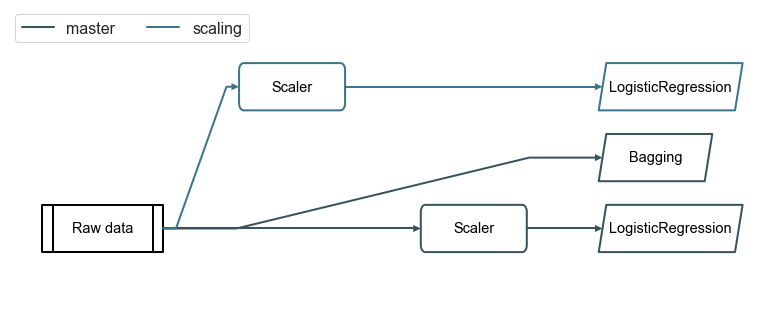

In [12]:
atom.plot_pipeline()
